# DB[RC/S3]
Density-Based Residue Clustering by Dissimilarity Between Sequence SubSets)
#
## Ring-hydroxylating Dioxygenases

In [1]:
from protlearn import *
from sklearn.ensemble import RandomForestRegressor

In [2]:
###====================================================================================================
### Parameters
###====================================================================================================

class Args(object):
    def __init__(self) -> None:
        self.__getattr__ = None
args = Args()
args.file = 'alignment.fasta'
args.expand_alphabet = False
args.min_freq = .25
args.max_dist = 1.
args.min_size = 3
args.out = None

if args.out is None:
    args.out = 'output/' + args.file.split('.')[0]

In [3]:
# #====================================================================================================
msa = MSA()
msa.parse(args.file)
msa.read()

In [4]:
msa.headers

['A0A1V1ZE67_9FLAO/178-361',
 'A0A0J1DCU0_9BURK/170-416',
 'J2WKD9_9SPHN/182-387',
 'A0A1Q3AVG0_CEPFO/233-414',
 'A0A5N0VGT3_9PSEU/179-385',
 'A0A2M8QHP4_9SPHN/170-438',
 'A0A3N7F1M7_POPTR/242-370',
 'A0A085TXN7_9RHOB/198-393',
 'A0A1G9KK55_9GAMM/195-391',
 'A0A287XI26_HORVV/179-273',
 'A0A4Z1BWM5_9RHOB/170-397',
 'A0A4P8ISH9_9BURK/174-408',
 'A0A521EMG9_9RHOB/173-399',
 'C3Z2U0_BRAFL/214-401',
 'A0A516V1Z3_9GAMM/173-355',
 'A0A553WJU6_9SPHN/162-393',
 'A0A1B1YUU6_9GAMM/195-442',
 'A0A257GLY2_9RHOB/172-368',
 'A0A291GFX6_9RHOB/163-416',
 'N6YYT3_9RHOO/170-440',
 'A0A4Y9MMH6_9ACTN/170-451',
 'A0A4Y9ELA6_9SPHN/174-372',
 'A0A0Q6BLT6_9RHIZ/231-353',
 'A0A2I2GLR6_9EURO/245-367',
 'A0A6M8SU86_9NEIS/151-371',
 'A0A3E0U426_9GAMM/137-378',
 'A0A0B1ZKR1_9SPHN/200-469',
 'A0A1E4S8T0_CYBJN/195-403',
 'A0A2R8C0S0_9RHOB/184-426',
 'A0A5N6T7K7_ASPPS/121-185',
 'A0A385YZT7_9PSED/188-423',
 'A0A0H4VEX4_9SPHN/157-423',
 'A0A127ETT5_9RHIZ/179-432',
 'T0HQV3_9SPHN/189-383',
 'A0A4R5UKW1_9RHIZ/174-401',
 

In [5]:
msa.sequences.shape

(9381, 1225)

In [6]:
msa.weights = [1./ float(msa.size) for i in range(msa.size)]
# msa.henikoff()
msa.weights

[0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,
 0.00010659844366272253,


In [7]:
df_msa = pd.DataFrame(msa.sequences)

# Calculate the proportion of "-" values weighted by row weight
gap_ratio = (df_msa == '-').mul(msa.weights, axis=0).sum()

# Filter the columns based on the condition that "-" is present in more than 90% of the rows
selected_columns = gap_ratio.index[(gap_ratio < args.min_freq)]

# Select only the columns corresponding to the selected features
df_raw = df_msa[selected_columns]
df_raw

,132,146,148,150,177,178,179,180,181,182,...,1108,1110,1112,1113,1114,1116,1117,1119,1120,1125
0,k,D,Y,H,V,N,C,H,W,A,...,H,H,F,H,S,L,L,A,K,n
1,q,-,-,R,I,K,G,D,W,K,...,R,G,F,Y,E,Y,Y,R,T,g
2,t,V,Y,D,I,D,A,N,W,K,...,R,H,L,F,N,I,V,Y,E,a
3,v,E,Y,T,L,E,C,N,W,K,...,H,H,F,H,C,-,-,-,-,l
4,-,H,M,E,I,E,A,N,W,K,...,I,E,F,Y,R,W,Y,Q,E,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9376,i,-,-,-,I,H,C,N,W,K,...,R,N,Q,F,R,A,W,A,R,e
9377,k,D,I,V,E,K,G,N,W,K,...,E,K,F,C,E,W,Y,V,G,a
9378,-,R,Y,E,I,T,A,N,W,K,...,A,R,F,Q,L,L,V,A,-,s
9379,s,-,-,-,-,-,-,-,-,-,...,L,F,F,Q,K,G,V,R,D,t


In [8]:
"""
Attention!!! This snippet is specific for this particular example so it must be adapted to
each particular case.
"""
df_metadata = pd.read_csv('data.tsv', delimiter='\t').dropna(subset='EC number')

df_metadata['1st EC number'] = df_metadata['EC number'].apply(lambda x: str(x).split('; ')[0])

df_metadata

,Entry,Entry Name,Protein names,EC number,1st EC number
0,O04121,CHMO_SPIOL,"Choline monooxygenase, chloroplastic (EC 1.14....",1.14.15.7,1.14.15.7
1,O85673,ANTDA_ACIAD,"Anthranilate 1,2-dioxygenase large subunit (EC...",1.14.12.1,1.14.12.1
2,P0A110,NDOB_PSEPU,"Naphthalene 1,2-dioxygenase system, large oxyg...",1.14.12.12,1.14.12.12
3,P0A111,NDOB_PSEU8,"Naphthalene 1,2-dioxygenase system, large oxyg...",1.14.12.12,1.14.12.12
4,P0C618,BNZA_PSEPU,"Benzene 1,2-dioxygenase subunit alpha (EC 1.14...",1.14.12.11; 1.14.12.3,1.14.12.11
...,...,...,...,...,...
46741,W7WV49,W7WV49_9BURK,"Salicylate 5-hydroxylase, large oxygenase comp...",1.14.13.-,1.14.13.-
46743,W7X7K2,W7X7K2_9BURK,Biphenyl dioxygenase subunit alpha (EC 1.14.12...,1.14.12.18,1.14.12.18
46752,W8UJU6,W8UJU6_KLEPN,"Benzoate 1,2-dioxygenase alpha subunit (EC 1.1...",1.14.12.-; 1.14.12.10,1.14.12.-
46773,W9V0M8,W9V0M8_9GAMM,"Benzene 1,2-dioxygenase subunit alpha (EC 1.14...",1.14.12.3,1.14.12.3


In [9]:
df_metadata['1st EC number'].value_counts()

1st EC number
1.14.15.7      2848
1.14.12.1       796
1.14.12.10      705
1.14.13.239     649
1.14.12.19      528
1.14.12.13      302
1.14.12.18      244
1.14.12.12      138
1.14.13.172     135
1.14.12.-       129
1.14.12.3       101
1.14.13.-        62
1.14.12.15       44
1.14.12.14       37
1.14.-.-         31
4.1.1.96         26
1.-.-.-          17
1.14.13.111      13
2.5.1.18          9
1.14.12.25        8
1.14.12.11        8
1.13.11.-         6
6.2.1.-           4
1.14.1.-          3
1.14.15.-         1
1.1.1.40          1
2.3.1.-           1
1.13.-.-          1
3.4.19.3          1
1.14.13.1         1
2.1.2.-           1
1.14.12.26        1
4.1.1.-           1
2.7.7.7           1
2.1.1.72          1
1.14.12.24        1
1.13.11.1         1
1.5.5.2           1
1.1.1.31          1
3.6.1.31          1
Name: count, dtype: int64

In [10]:
seq_ids = list(map(lambda x: x.split('/')[0].split('_')[0], msa.headers))
seq_idx = list(range(msa.size))
df_indices = pd.DataFrame({'Entry':seq_ids, 'Index':seq_idx})

# Join the dataframes based on the 'ID' column
df_metadata = pd.merge(df_metadata, df_indices, on='Entry')
df_metadata

,Entry,Entry Name,Protein names,EC number,1st EC number,Index
0,A0A401KD97,A0A401KD97_ASPAW,Bifunctional lycopene cyclase/phytoene synthas...,1.14.15.7; 2.5.1.32; 5.5.1.19,1.14.15.7,2247
1,A0A024HID4,A0A024HID4_PSEKB,Carnitine monooxygenase oxygenase subunit (EC ...,1.14.13.239,1.14.13.239,7717
2,A0A0B7G8U8,A0A0B7G8U8_KLEVA,Carnitine monooxygenase oxygenase subunit (EC ...,1.14.13.239,1.14.13.239,2106
3,A0A0D1ZK14,A0A0D1ZK14_9EURO,"Choline monooxygenase, chloroplastic (EC 1.14....",1.14.15.7,1.14.15.7,5410
4,A0A0F3KB91,A0A0F3KB91_9NEIS,Carnitine monooxygenase oxygenase subunit (EC ...,1.14.13.239,1.14.13.239,3208
...,...,...,...,...,...,...
2637,W5TKB8,W5TKB8_9NOCA,Putative 3-phenylpropionate/cinnamic acid diox...,1.14.12.19,1.14.12.19,5215
2638,W7WV49,W7WV49_9BURK,"Salicylate 5-hydroxylase, large oxygenase comp...",1.14.13.-,1.14.13.-,7111
2639,W7X7K2,W7X7K2_9BURK,Biphenyl dioxygenase subunit alpha (EC 1.14.12...,1.14.12.18,1.14.12.18,8296
2640,W9V0M8,W9V0M8_9GAMM,"Benzene 1,2-dioxygenase subunit alpha (EC 1.14...",1.14.12.3,1.14.12.3,7275


In [11]:
df_metadata['1st EC number'].value_counts()

1st EC number
1.14.15.7      1965
1.14.12.1       151
1.14.12.10       81
1.14.12.19       69
1.14.12.18       59
1.14.12.12       51
1.14.13.239      50
1.14.12.13       48
1.14.12.-        29
1.14.12.3        28
1.14.13.172      27
1.14.13.-        20
1.14.12.15       15
1.14.-.-         10
1.14.13.111       8
1.14.12.14        7
1.13.11.-         5
1.-.-.-           5
2.5.1.18          4
1.1.1.31          1
6.2.1.-           1
1.5.5.2           1
4.1.1.96          1
1.14.12.25        1
4.1.1.-           1
1.14.1.-          1
2.1.2.-           1
1.14.12.11        1
1.13.-.-          1
Name: count, dtype: int64

In [21]:
exclude = ['1.14.15.7',
           '1.-.-.-',
           '1.13.-.-',
           '1.13.11.-',
           '1.14.-.-',
           '1.14.1.-',
           '1.14.12.-',
           '1.14.13.-',
           '2.1.2.-',
           '4.1.1.-',
           '6.2.1.-']
df_metadata = df_metadata[~df_metadata['1st EC number'].isin(exclude)]
df_metadata['1st EC number'].value_counts()

1st EC number
1.14.12.1      151
1.14.12.10      81
1.14.12.19      69
1.14.12.18      59
1.14.12.12      51
1.14.13.239     50
1.14.12.13      48
1.14.12.3       28
1.14.13.172     27
1.14.12.15      15
1.14.13.111      8
1.14.12.14       7
2.5.1.18         4
4.1.1.96         1
1.5.5.2          1
1.1.1.31         1
1.14.12.25       1
1.14.12.11       1
Name: count, dtype: int64

In [22]:
df_encoded = pd.get_dummies(df_metadata['1st EC number']).astype(int)
df_encoded

,1.1.1.31,1.14.12.1,1.14.12.10,1.14.12.11,1.14.12.12,1.14.12.13,1.14.12.14,1.14.12.15,1.14.12.18,1.14.12.19,1.14.12.25,1.14.12.3,1.14.13.111,1.14.13.172,1.14.13.239,1.5.5.2,2.5.1.18,4.1.1.96
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2639,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
df_chars = df_raw.iloc[df_metadata['Index']]
df_chars

,132,146,148,150,177,178,179,180,181,182,...,1108,1110,1112,1113,1114,1116,1117,1119,1120,1125
7717,i,V,T,R,T,P,A,N,W,K,...,A,H,F,H,N,L,-,-,-,i
2106,h,T,T,L,T,P,A,N,W,K,...,A,H,F,H,N,L,V,A,Q,f
3208,i,V,T,A,T,P,A,N,W,K,...,A,H,F,H,H,L,V,A,R,h
6485,h,T,T,L,T,P,A,N,W,K,...,A,H,F,H,N,L,V,A,Q,f
1801,i,V,S,E,T,P,A,N,W,K,...,A,H,F,H,H,L,L,A,Q,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,s,S,Y,V,Y,E,G,N,W,K,...,I,A,H,H,H,H,W,Q,T,l
5215,l,Y,L,D,L,E,G,N,W,K,...,R,A,F,Y,A,R,W,R,E,n
8296,-,Y,M,D,I,P,C,N,W,K,...,R,G,M,Y,H,H,W,A,R,-
7275,p,Y,L,D,Y,E,C,N,W,K,...,R,A,F,Y,Q,Y,W,Y,D,a


In [24]:
def target_mean(df, by, on):
    means = df.groupby(by)[on].mean()
    return df[by].map(means)

In [40]:
ftr_imp = []
for i in df_encoded.columns:
    target = df_encoded[i].tolist()
    df_num = df_chars.copy()
    df_num['Target'] = target
    for j in df_num.columns:
        df_num[j] = target_mean(df_num, by=j, on='Target')

    # Split the dataset into features (X) and target (y)
    X = df_num.drop('Target', axis=1)
    y = df_num['Target']

    # Fit a random forest model to the data
    rf = RandomForestRegressor(random_state=0)
    rf.fit(X, y)
    ftr_imp.append(rf.feature_importances_)
arr = np.array(ftr_imp)
averages = np.max(arr, axis=0)

averages

array([1.79995712e-02, 7.49896489e-02, 2.34082772e-02, 4.28794616e-02,
       4.93663415e-02, 3.09651538e-02, 2.76710066e-01, 1.42880028e-02,
       2.26157244e-03, 5.39342643e-03, 9.05118387e-03, 7.93650794e-02,
       2.18872381e-02, 3.17669971e-02, 2.10833066e-03, 4.37829730e-02,
       4.06058871e-02, 5.87512986e-02, 1.02281264e-02, 2.45713152e-02,
       1.66721964e-04, 3.98028657e-03, 2.91756535e-02, 2.26126570e-02,
       1.97646917e-02, 8.39285714e-01, 4.85167663e-01, 5.39532345e-02,
       1.33333333e-01, 1.60714286e-01, 1.91928225e-02, 2.56064910e-02,
       5.33300502e-02, 1.16670067e-02, 3.72274925e-02, 2.14889736e-02,
       2.11495076e-02, 2.32674634e-02, 2.37318416e-02, 1.76476882e-01,
       3.53390109e-02, 2.88241317e-02, 4.78472057e-02, 5.92152007e-02,
       1.43464268e-02, 7.84512859e-03, 2.06002810e-02, 6.53403627e-02,
       2.23832246e-02, 3.52275609e-02, 2.09757741e-02, 3.47423868e-02,
       1.96807745e-02, 1.73630990e-02, 5.71682311e-02, 4.07493353e-02,
      

In [41]:
# Get the feature importances and sort them in descending order
importances = pd.Series(averages, index=X.columns)#.sort_values(ascending=False)

# Calculate the cumulative sum of the importance values
cumulative_importance = importances.cumsum()
cumulative_importance

132     0.018000
146     0.092989
148     0.116397
150     0.159277
177     0.208643
          ...   
1116    8.963185
1117    8.979459
1119    9.002460
1120    9.023160
1125    9.054310
Length: 163, dtype: float64

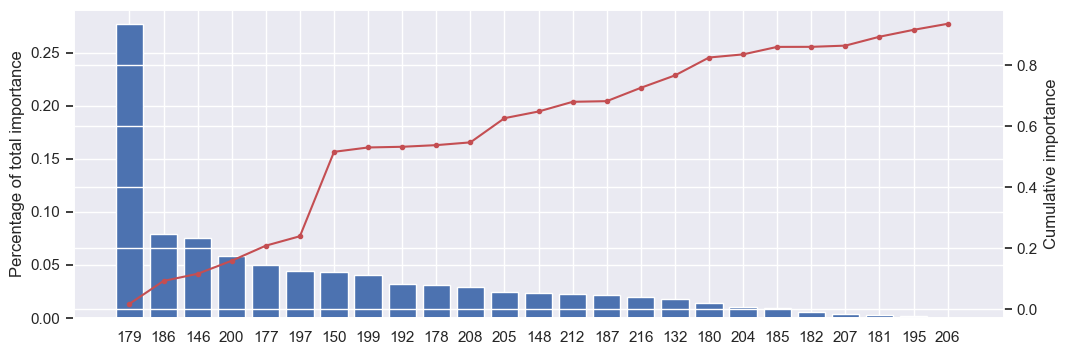

In [43]:
# Filter the feature importances to keep only those that contribute to 99% of the importance
most_important = importances[cumulative_importance <= 0.99].sort_values(ascending=False)
selected_features = importances[cumulative_importance <= 0.99].index
higher_importance = cumulative_importance[selected_features]

fig, ax1 = plt.subplots(figsize=(12, 4))

# Bar chart of percentage importance
xvalues = range(len(most_important))
ax1.bar(xvalues, most_important, color='b')
ax1.set_ylabel('Percentage of total importance')
ax1.tick_params(axis='y')

# Line chart of cumulative percentage importance
ax2 = ax1.twinx()
ax2.plot(xvalues, higher_importance, color='r', marker='.')
ax2.set_ylabel('Cumulative importance')
ax2.tick_params(axis='y')

# Rotate x-axis labels
plt.xticks(xvalues, most_important.index, rotation=90)

plt.show()

In [44]:
# Select only the columns corresponding to the selected features
df_selected = df_num[selected_features]
df_selected

,132,146,148,150,177,178,179,180,181,182,...,197,199,200,204,205,206,207,208,212,216
7717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.007692,0.00303,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.011111
2106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.007692,0.00303,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.011111
3208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.000000,0.00303,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.011111
6485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.007692,0.00303,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.011111
1801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.007692,0.00303,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.011111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.000000,0.000000,0.00000,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.000000
5215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.005848,0.000000,0.00000,0.000000,0.001808,0.001689,0.0,0.0,0.0,0.000000
8296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.005848,0.000000,0.00000,0.166667,0.001808,0.001689,0.0,0.0,0.0,0.000000
7275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001733,...,0.005848,0.000000,0.00000,0.000000,0.000000,0.001689,0.0,0.0,0.0,0.000000


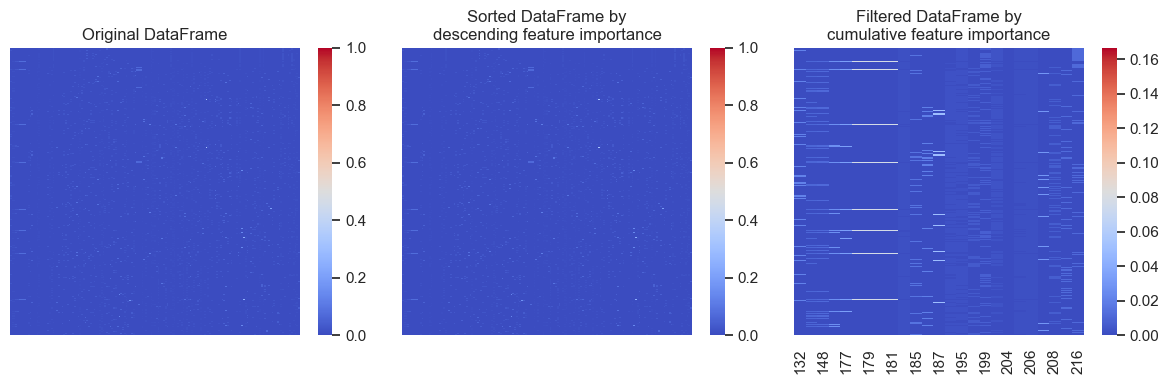

In [45]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot the original DataFrame
sns.heatmap(X, cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[0])
axs[0].set_title('Original DataFrame')

# Plot the sorted DataFrame
sns.heatmap(X[importances.index], cmap='coolwarm', xticklabels=False, yticklabels=False, ax=axs[1])
axs[1].set_title('Sorted DataFrame by\ndescending feature importance')

# Plot the filtered DataFrame
sns.heatmap(df_selected, cmap='coolwarm', yticklabels=False, ax=axs[2])
axs[2].set_title('Filtered DataFrame by\ncumulative feature importance')

plt.tight_layout()
plt.show()

In [46]:
# #====================================================================================================
R = []
for col in most_important.index:
    R += msa.collection[col]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# #====================================================================================================
G = nx.Graph()
for i, a in enumerate(R[:-1]):
    if a.p() >= args.min_freq:
        for b in R[i + 1:]:
            if b.p() >= args.min_freq:
                G.add_edge(
                    a,
                    b,
                    weight = float(
                        sum(
                            map(lambda x: msa.weights[x], a.sequence_indices ^ b.sequence_indices)
                        )
                    ) / float(
                        sum(
                            map(lambda x: msa.weights[x], a.sequence_indices | b.sequence_indices)
                        )
                    )
                )
# #====================================================================================================
N = sorted(G.nodes(), key=lambda x: x.p(), reverse=True)
for n in N:
    print(n)
# #====================================================================================================
D = nx.to_numpy_array(G, nodelist=N)
D

In [ ]:
# Plot the distance matrix
fig, ax = plt.subplots()
im = ax.imshow(D, cmap='viridis')

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [ ]:
# #====================================================================================================
optics_instance = optics(D, args.max_dist, args.min_size, None, 'distance_matrix')
optics_instance.process()
clusters = optics_instance.get_clusters()
# #====================================================================================================
ordering = ordering_analyser(optics_instance.get_ordering())
ordering = ordering.cluster_ordering
plt.figure()
plt.bar(range(0, len(ordering)), ordering[0:len(ordering)], width=1., color='black')
plt.xlim([0, len(ordering)])
plt.xlabel('Points')
plt.ylabel('Reachability Distance')
plt.savefig('%s_reachability_plot.png' % args.out)

In [ ]:
# #====================================================================================================
clusters = sorted(clusters, key=lambda x: np.mean(list(map(lambda y: N[y].p(), x))), reverse=True)
i = 0
while i < len(clusters):
    positions = set(map(lambda x: N[x].position, clusters[i]))
    same_position = {k: [] for k in positions}
    for j in clusters[i]:
        same_position[N[j].position].append(j)
    temp = []
    c = Subset(msa, list(set.union(*map(lambda x: set(N[x].sequence_indices), clusters[i]))))
    for j in clusters[i]:
        if j == max(same_position[N[j].position], key=lambda x: N[x].p.given(c)):
            temp.append(j)
    if len(temp) >= args.min_size:
        clusters[i] = temp
        i += 1
    else:
        del clusters[i]
clusters

In [ ]:
# #====================================================================================================
with open('%s_clusters.csv' % args.out, 'w') as outfile:
    for i in range(len(clusters)):
        outfile.write('Cluster %d\n' % (i + 1))
        d = {'MSA\nColumn': [], 'Feature': [], 'Frequency': []}
        for j in sorted(clusters[i], key=lambda x: N[x].position):
            d['MSA\nColumn'].append(N[j].position + 1)
            d['Feature'].append(N[j])
            d['Frequency'].append('%.2f' % round(N[j].p(), 2))
        df = pd.DataFrame(d)
        outfile.write(df.to_csv(index=False))
        outfile.write('\n')

In [ ]:
# #====================================================================================================
H = []
for i in range(msa.size):
    row = []
    for j in range(len(clusters)):
        count = 0
        for k in clusters[j]:
            if i in N[k].sequence_indices:
                count += 1
        row.append(float(count) / float(len(clusters[j])))
    H.append(row)
H = np.array(H)
H

In [ ]:
# #====================================================================================================
Z = linkage(H, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=np.array(msa.headers))
plt.savefig('%s_dendrogram.png' % args.out)
tree = to_tree(Z, False)
with open('%s_dendrogram.nwk' % args.out, 'w') as outfile:
    outfile.write(get_newick(tree, "", tree.dist, msa.headers))

In [ ]:
# #====================================================================================================
df = get_df(H, msa, range(msa.size), range(len(clusters)))
seq = df.pop('Seq. ID')
try:
    g = sns.clustermap(df, col_cluster=False, yticklabels=False, figsize=(4,4))
except SystemExit:
    raise 'Warning: few clusters to draw a heatmap!'
row_idx = g.dendrogram_row.reordered_ind
# col_idx = g.dendrogram_col.reordered_ind
col_idx = range(len(clusters))  # Keep column index without dendrogram
H = [H[i] for i in row_idx]
H = np.array(H)
df = get_df(H, msa, row_idx, col_idx)
df.to_csv('%s_seq_adhesion.csv' % args.out)
plt.savefig('%s_seq_adhesion.png' % args.out)

In [ ]:
# #====================================================================================================
# # Optional viewing
# #====================================================================================================
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", normalized_stress='auto')
pts = mds.fit(D).embedding_
clf = PCA(n_components=2)
pts = clf.fit_transform(pts)
# #====================================================================================================
colors = np.array(list(map(lambda x: x.p(), N))) * 100
_, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Residue Plot with noise
X_full, Y_full = zip(*pts)
sc = axs[0].scatter(X_full, Y_full, c=colors, cmap='rainbow', vmin=0., vmax=100., alpha=.5)
cb = plt.colorbar(sc, ax=axs[0])
cb.set_label('Frequency (%s)' % '%')
axs[0].set_title('Residue Plot with noise')

# #====================================================================================================
# Plot 2: Residue Plot without noise
noise = optics_instance.get_noise()
points, colors = [], []
for i, (p, c) in enumerate(zip(pts, list(map(lambda x: x.p(), N)))):
    if i not in noise:
        points.append(p)
        colors.append(c)
colors = np.array(colors) * 100
X_clean, Y_clean = zip(*points)
sc = axs[1].scatter(X_clean, Y_clean, c=colors, cmap='rainbow', vmin=0., vmax=100., alpha=0.5)
cb = plt.colorbar(sc, ax=axs[1])
cb.set_label('Frequency (%s)' % '%')
axs[1].set_title('Residue Plot without noise')

plt.savefig('%s_residue_plot_combined.png' % args.out)


In [ ]:
# #====================================================================================================
# # END
# #====================================================================================================